<a href="https://colab.research.google.com/github/hirokimituya/stock-price-analysis/blob/main/technical_analysis/%E6%A0%AA%E4%BE%A1%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas_datareader.data as pdr

# 株価データを取得するメソッド
def get_stock_data(code):
    """株価データを取得するメソッド

    :param code: 取得する株価データの銘柄コード
    :return: 株価データのデータフレーム
    """
    df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
    return df

<Axes: xlabel='Date'>

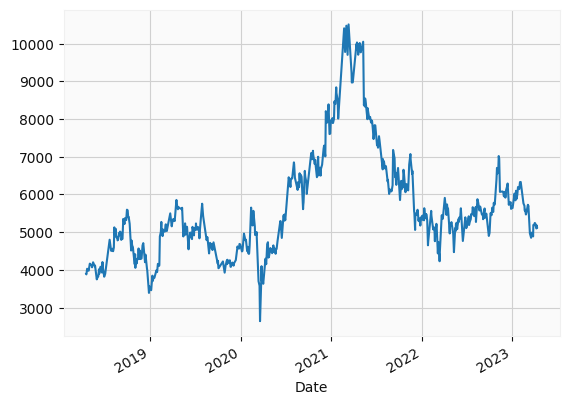

In [22]:
#　ソフトバンクの株価データ取得
df = get_stock_data(9984)
df['Close'].plot()

### 高値と安値で差が大きいデータが多いほど、短期間での売買で利益を出しやすい銘柄であると判断できる


In [23]:
# 高値と安値の差が300円以上の株価データ
df.query('High - Low >= 300').tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-08,6655.0,6997.0,6650.0,6929.0,33680300.0
2022-11-14,6353.0,6453.0,5956.0,6068.0,40860800.0
2022-11-16,6090.0,6400.0,6090.0,6328.0,32497500.0
2022-11-18,6355.0,6363.0,6044.0,6075.0,25586100.0
2022-12-20,6038.0,6041.0,5715.0,5726.0,16122200.0


In [24]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ローソク足チャートを描画する

In [25]:
# コロワイドの株価データを取得
df = get_stock_data(7616)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-07,1970.0,1994.0,1965.0,1974.0,306600
2023-04-10,1976.0,1995.0,1975.0,1994.0,274200
2023-04-11,2002.0,2035.0,2002.0,2035.0,461500
2023-04-12,2040.0,2070.0,2040.0,2067.0,296200
2023-04-13,2058.0,2059.0,2024.0,2043.0,315300


In [44]:
import mplfinance as mpf
import datetime as dt

# ローソク足と出来高を表示するメソッド
def show_plot(code, start, end, mav=(), width=2, period=None):
    """ローソク足や移動平均線のチャートを表示するメソッド

    :param code: 取得する株価データの銘柄コード
    :param start: 取得する株価データの開始日
    :param end: 取得する株価データの終了日
    :param mav: チャートに移動平均線を表示するためのタプル（例: (5, 25, 75)）
    :param period: 表示するチャートの期間をどの単位でまとめるか（'M' or 'W'）
    """
    df = get_stock_data(code)

    # 月足、周足にリサンプリング
    if period in ('M', 'W'):
        resampled = df.resample(period)
        df = resampled.aggregate({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

    rdf = df[start:end]
    mpf.plot(rdf, type='candle', mav=mav, figratio=(width, 1), volume=True, style='yahoo')

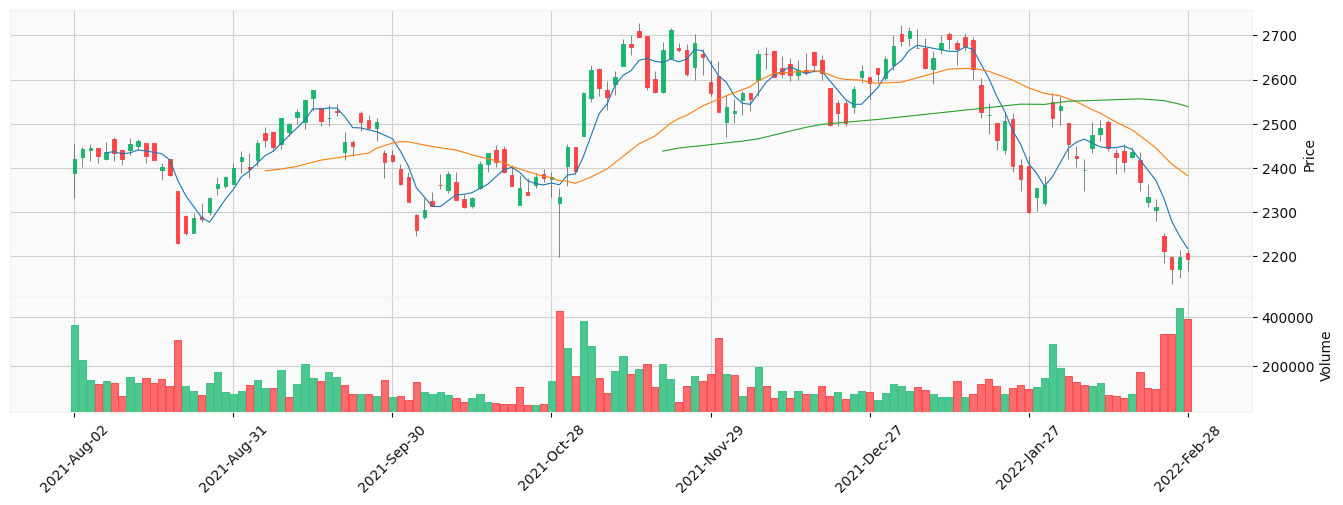

In [46]:
# 周足ローソク足チャートの表示
show_plot(6508, '2021-8-1', '2022-2-28', (5, 25, 75), 3)